In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [4]:
PATH = Path('data/food-101')
URL = 'http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz'

In [ ]:
untar_data(URL, 'food-101.tar.gz', PATH)

In [4]:
PATH.ls()

['food-101.tar.gz',
 'images',
 'license_agreement.txt',
 'meta',
 'README.txt',
 'labels.csv',
 'test.csv',
 'crawl-300d-2M.vec.zip',
 'tmp',
 'crawl-300d-2M.vec',
 'wiki.en.zip',
 'wiki.en.vec',
 'wiki.en.bin',
 'classids.txt',
 'models',
 'test_files.txt',
 'test']

In [8]:
img_path = PATH/'images'

In [9]:
img_path.ls()

['beignets',
 'prime_rib',
 'ramen',
 'hamburger',
 'bruschetta',
 'chicken_wings',
 'pork_chop',
 'greek_salad',
 'sashimi',
 'risotto',
 'pizza',
 'eggs_benedict',
 'guacamole',
 'chocolate_cake',
 'miso_soup',
 'apple_pie',
 'fried_calamari',
 'fried_rice',
 'panna_cotta',
 'hummus',
 'carrot_cake',
 'beet_salad',
 'garlic_bread',
 'hot_dog',
 'steak',
 'tiramisu',
 'fish_and_chips',
 'caesar_salad',
 'tuna_tartare',
 'pancakes',
 'chocolate_mousse',
 'lasagna',
 'pad_thai',
 'cheesecake',
 'baklava',
 'ice_cream',
 'red_velvet_cake',
 'tacos',
 'foie_gras',
 'grilled_cheese_sandwich',
 'frozen_yogurt',
 'seaweed_salad',
 'breakfast_burrito',
 'crab_cakes',
 'strawberry_shortcake',
 'beef_tartare',
 'mussels',
 'dumplings',
 'creme_brulee',
 'falafel',
 'scallops',
 'oysters',
 'samosa',
 'club_sandwich',
 'french_fries',
 'chicken_quesadilla',
 'escargots',
 'huevos_rancheros',
 'french_toast',
 'lobster_bisque',
 'onion_rings',
 'waffles',
 'french_onion_soup',
 'spring_rolls',
 '

In [26]:
data = ImageDataBunch.from_csv(PATH, folder='images', fn_col=1, label_col=0, 
                               suffix='.jpg', size=224, ds_tfms=get_transforms(flip_vert=True), test='test')

In [27]:
data.normalize(imagenet_stats)

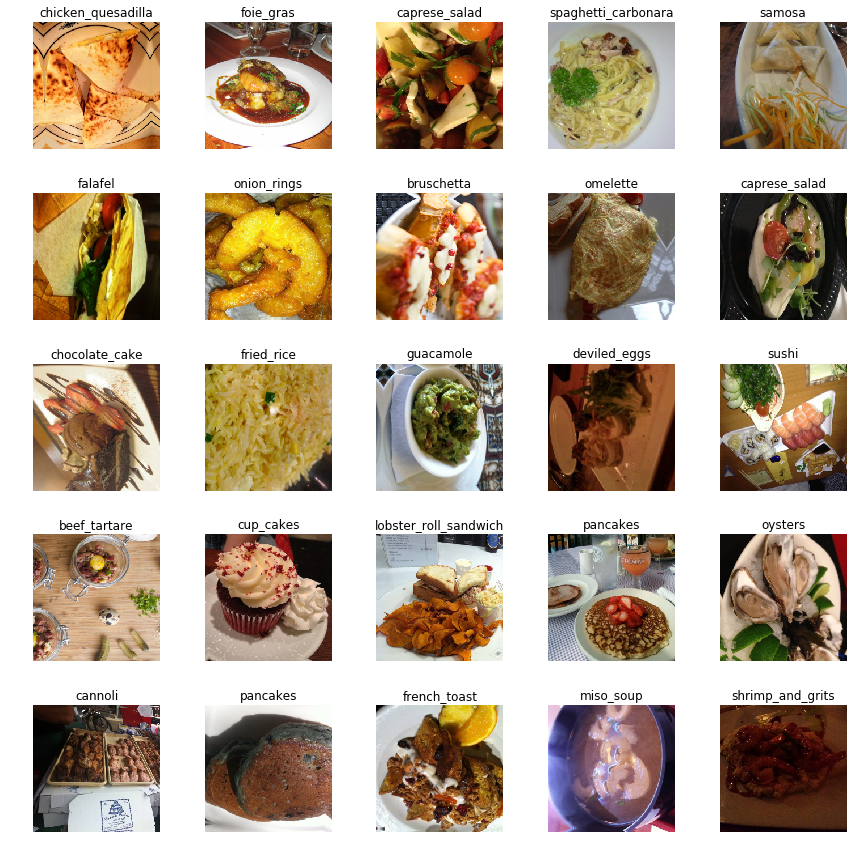

In [28]:
data.show_batch(rows=5, figsize=(12, 12))

In [8]:
print(data.classes)

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheesecake', 'cheese_plate', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_sou

In [9]:
print(data.c)

101


In [10]:
learn = ConvLearner(data, models.tvm.resnet50, metrics=accuracy)

In [17]:
learn.fit_one_cycle(5)

Total time: 1:28:20
epoch  train loss  valid loss  accuracy
0      1.814312    1.486222    0.613913  (17:56)
1      1.577775    1.311581    0.658031  (17:34)
2      1.378014    1.154674    0.695706  (17:35)
3      1.169348    1.037786    0.724308  (17:35)
4      1.113817    1.015520    0.732067  (17:38)



In [18]:
learn.save('v1_test-food-101-stage-2')

In [9]:
learn.load('v1_test-food-101-stage-2')

In [19]:
interp = ClassificationInterpretation.from_learner(learn)

Exception ignored in: <object repr() failed>
Traceback (most recent call last):
  File "/home/ubuntu/src/anaconda3/envs/fastaiv1/lib/python3.6/site-packages/fastai/basic_train.py", line 165, in __del__
    def __del__(self): del(self.model, self.data)
AttributeError: model


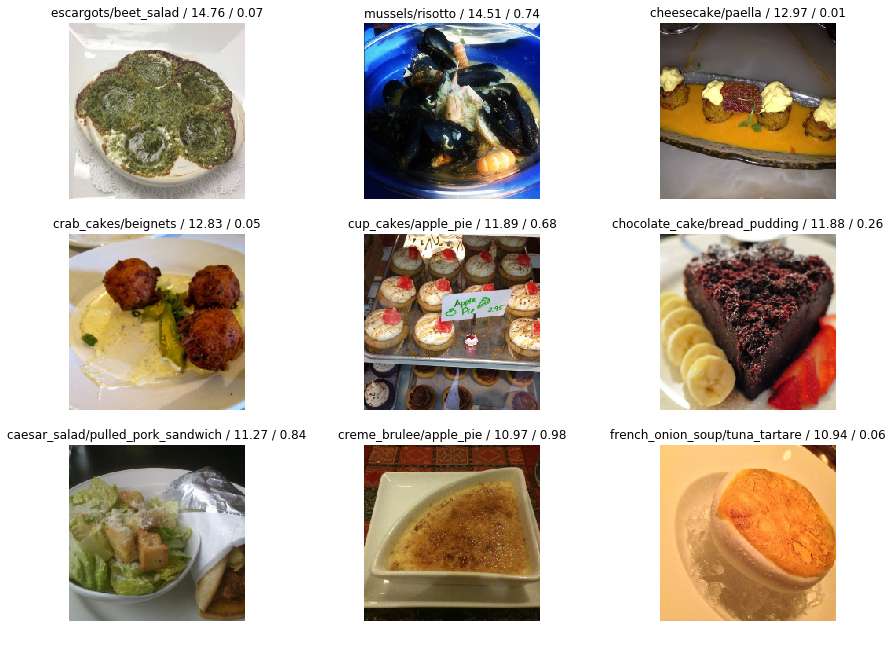

In [20]:
interp.plot_top_losses(9, figsize=(15, 11))

In [48]:
doc(interp.plot_top_losses)

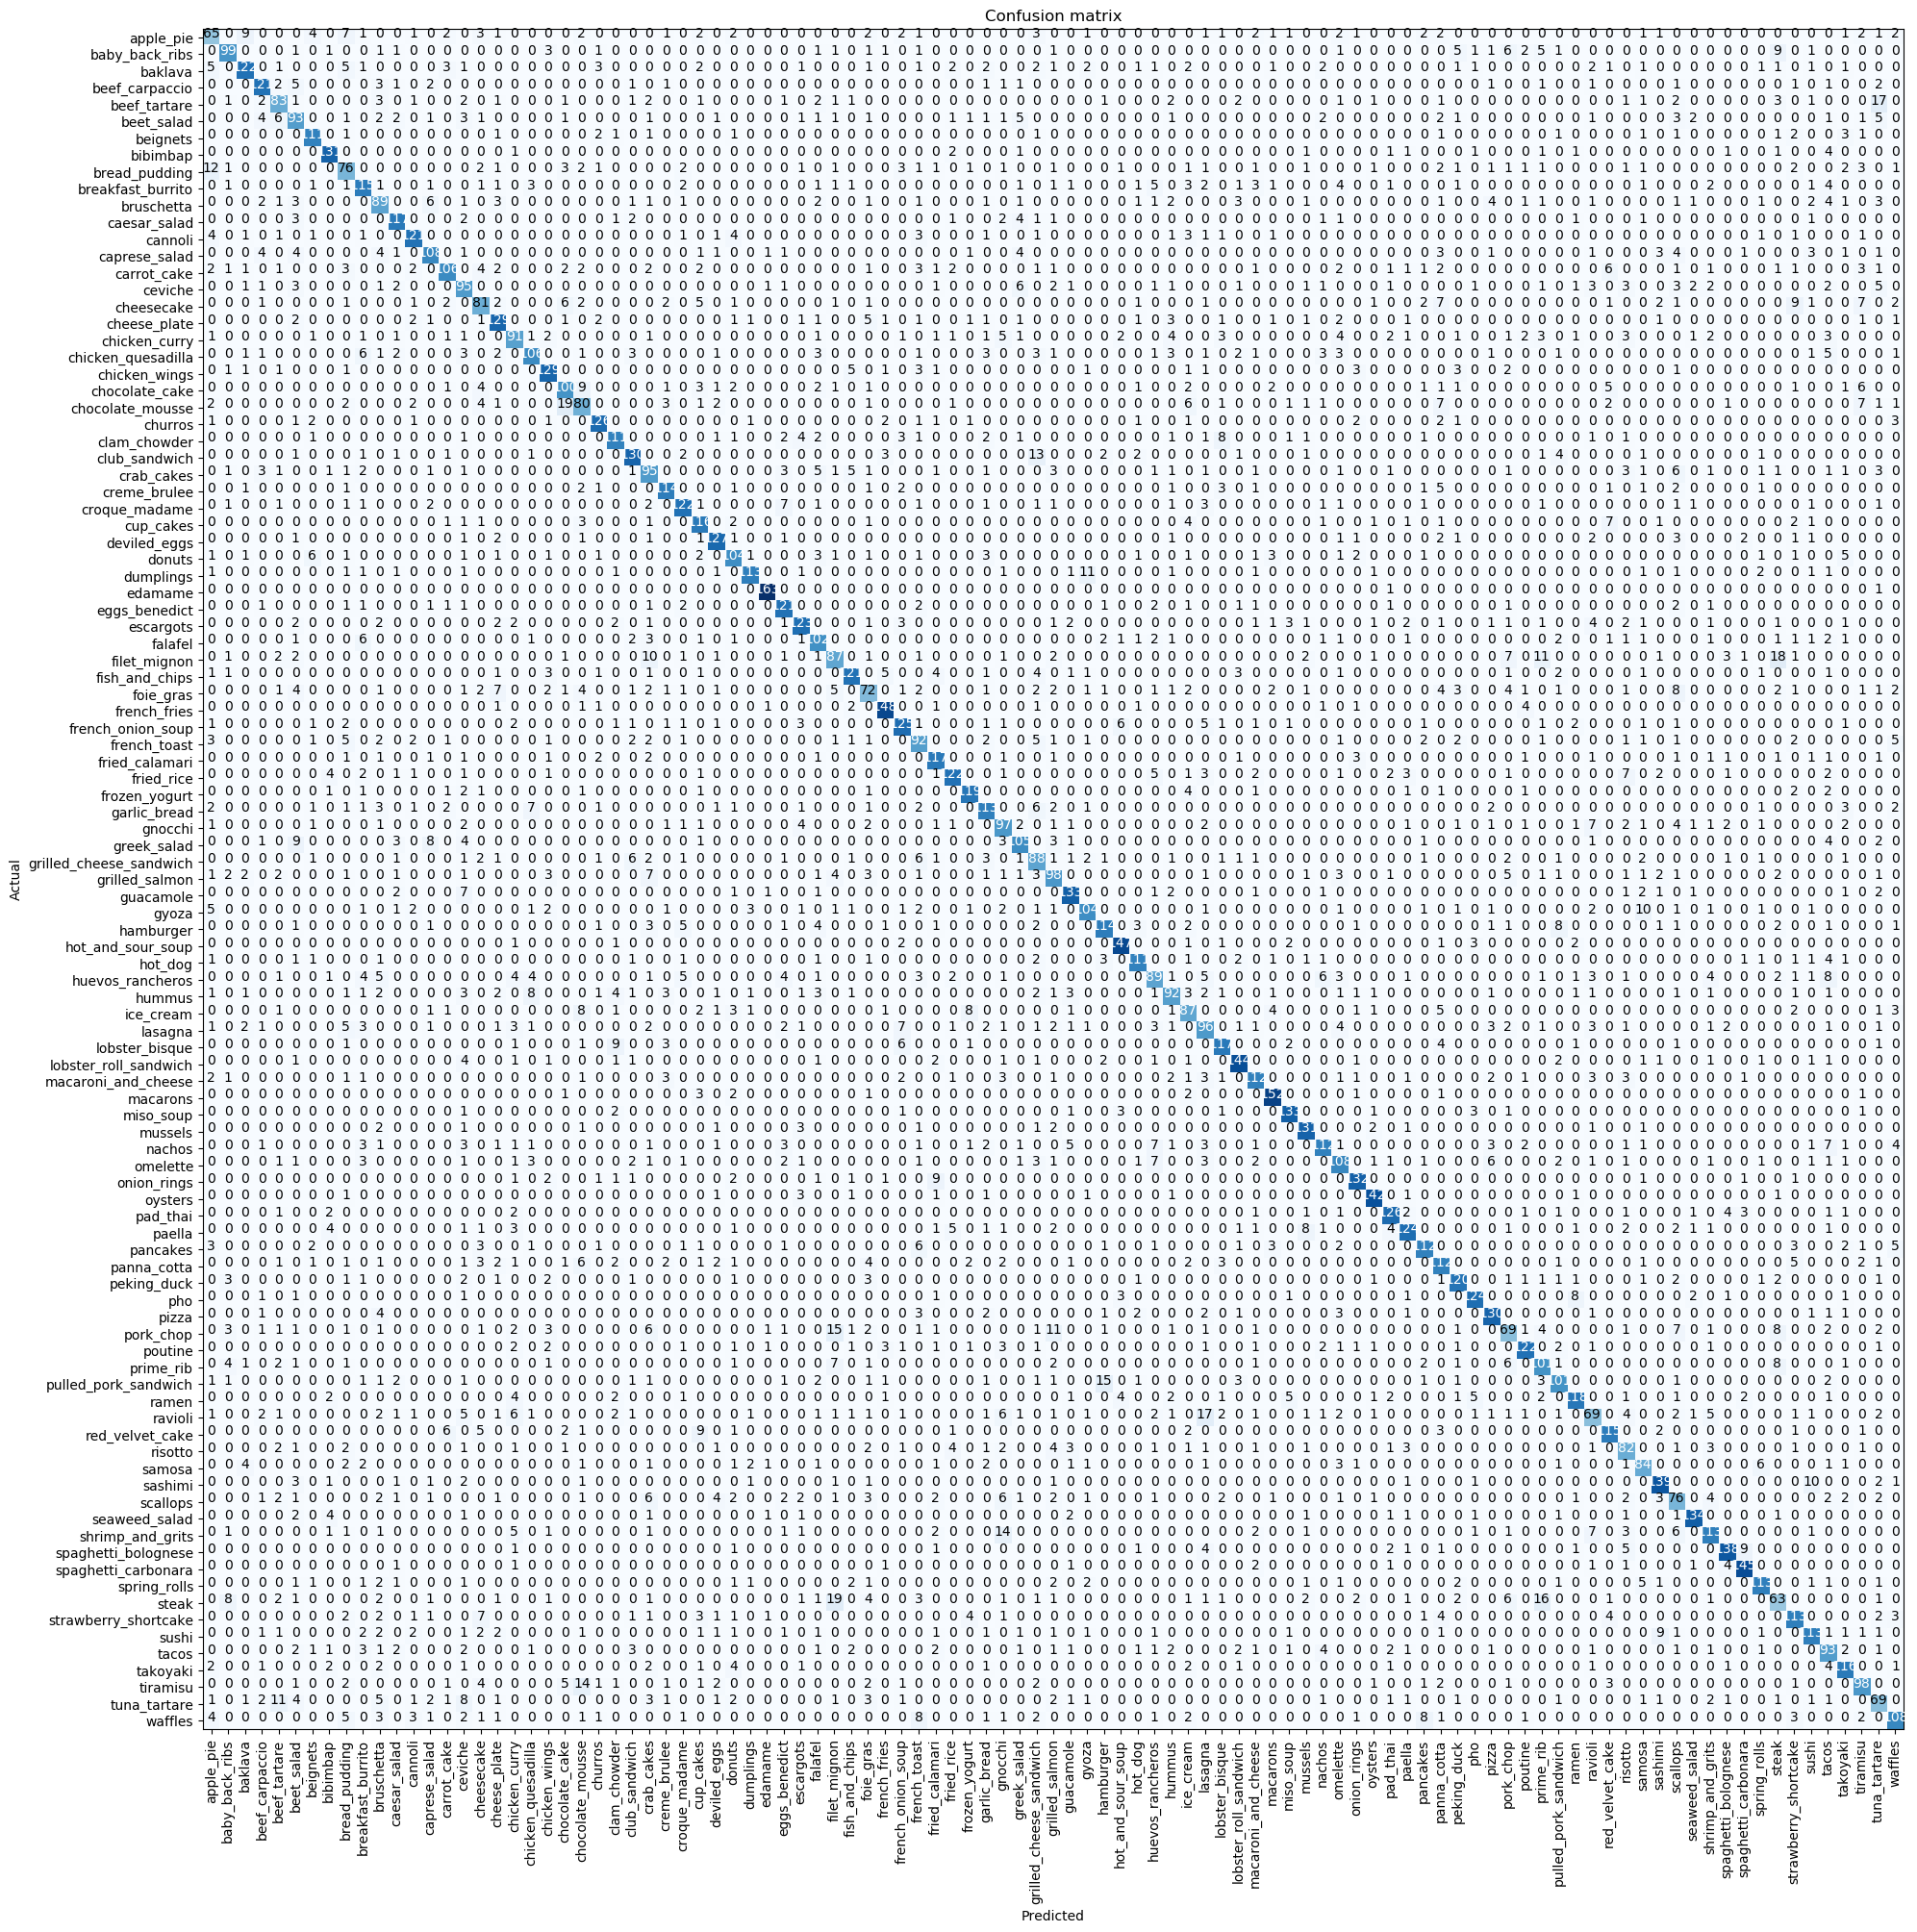

In [21]:
interp.plot_confusion_matrix(figsize=(20, 20), dpi=100)

In [22]:
interp.most_confused(min_val=2)

[('chocolate_mousse', 'chocolate_cake', 19),
 ('steak', 'filet_mignon', 19),
 ('filet_mignon', 'steak', 18),
 ('beef_tartare', 'tuna_tartare', 17),
 ('ravioli', 'lasagna', 17),
 ('steak', 'prime_rib', 16),
 ('pork_chop', 'filet_mignon', 15),
 ('pulled_pork_sandwich', 'hamburger', 15),
 ('shrimp_and_grits', 'gnocchi', 14),
 ('tiramisu', 'chocolate_mousse', 14),
 ('club_sandwich', 'grilled_cheese_sandwich', 13),
 ('bread_pudding', 'apple_pie', 12),
 ('dumplings', 'gyoza', 11),
 ('filet_mignon', 'prime_rib', 11),
 ('pork_chop', 'grilled_salmon', 11),
 ('tuna_tartare', 'beef_tartare', 11),
 ('filet_mignon', 'crab_cakes', 10),
 ('gyoza', 'samosa', 10),
 ('sashimi', 'sushi', 10),
 ('apple_pie', 'baklava', 9),
 ('baby_back_ribs', 'steak', 9),
 ('cheesecake', 'strawberry_shortcake', 9),
 ('chocolate_cake', 'chocolate_mousse', 9),
 ('greek_salad', 'beet_salad', 9),
 ('lobster_bisque', 'clam_chowder', 9),
 ('onion_rings', 'fried_calamari', 9),
 ('red_velvet_cake', 'cup_cakes', 9),
 ('spaghetti_b

In [10]:
learn.lr_find()

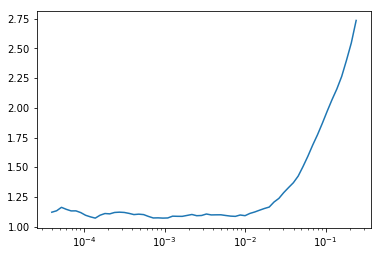

In [11]:
learn.recorder.plot()

In [12]:
learn.unfreeze()

In [13]:
learn.fit_one_cycle(5, max_lr=slice(1e-6, 1e-4))

Total time: 1:56:15
epoch  train loss  valid loss  accuracy
0      1.088787    0.837099    0.777713  (23:26)
1      1.086228    0.815043    0.782456  (23:12)
2      0.985790    0.796442    0.787459  (23:12)
3      0.934660    0.784846    0.791943  (23:12)
4      0.878315    0.784031    0.791618  (23:12)



In [15]:
learn.save('v1_test-food-101-stage-3')

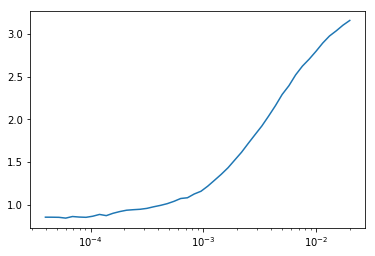

In [16]:
learn.lr_find()
learn.recorder.plot()

In [17]:
learn.fit_one_cycle(4, max_lr=slice(1e-6, 1e-4))

Total time: 1:32:46
epoch  train loss  valid loss  accuracy
0      0.857694    0.782315    0.791748  (23:11)
1      0.853931    0.771686    0.793892  (23:12)
2      0.800485    0.760900    0.796166  (23:12)
3      0.741230    0.755390    0.798376  (23:10)



In [18]:
learn.save('v1_test-food-101-stage-4')

In [19]:
learn.fit_one_cycle(4, max_lr=slice(1e-6, 1e-4))

Total time: 1:32:42
epoch  train loss  valid loss  accuracy
0      0.771243    0.759655    0.796296  (23:10)
1      0.725555    0.757548    0.797726  (23:11)
2      0.666700    0.745808    0.802989  (23:09)
3      0.667981    0.740630    0.801689  (23:11)



In [20]:
learn.save('v1_test-food-101-stage-5')

In [11]:
learn.load('v1_test-food-101-stage-5')

In [18]:
val_preds, val_y = learn.TTA()

Total time: 15:11



In [12]:
learn.TTA(is_test=True)

Total time: 25:24



(tensor([[ 6.2905, -0.1791,  4.1712,  ..., -1.4973,  1.3201, -0.6696],
         [ 8.2438, -1.1248,  3.3609,  ...,  0.4489, -1.6103,  1.1424],
         [ 5.4183,  1.3217,  4.5427,  ..., -1.1573,  1.4392,  1.2754],
         ...,
         [ 2.2890,  3.7128, -1.8878,  ..., -0.9480,  0.0341,  6.3940],
         [ 6.1818,  0.9419,  0.4953,  ...,  4.2971, -3.2393, 11.2076],
         [ 6.1893,  4.8953,  1.6536,  ...,  0.1513, -0.7862, 10.7266]]),
 tensor([0, 0, 0,  ..., 0, 0, 0]))

In [13]:
preds, y = _

In [14]:
preds

tensor([[ 6.2905, -0.1791,  4.1712,  ..., -1.4973,  1.3201, -0.6696],
        [ 8.2438, -1.1248,  3.3609,  ...,  0.4489, -1.6103,  1.1424],
        [ 5.4183,  1.3217,  4.5427,  ..., -1.1573,  1.4392,  1.2754],
        ...,
        [ 2.2890,  3.7128, -1.8878,  ..., -0.9480,  0.0341,  6.3940],
        [ 6.1818,  0.9419,  0.4953,  ...,  4.2971, -3.2393, 11.2076],
        [ 6.1893,  4.8953,  1.6536,  ...,  0.1513, -0.7862, 10.7266]])

In [17]:
y.size()

torch.Size([25250])

In [19]:
interp = ClassificationInterpretation.from_learner(learn)

In [20]:
interp.most_confused(min_val=2)

[('filet_mignon', 'steak', 19),
 ('prime_rib', 'steak', 17),
 ('steak', 'filet_mignon', 17),
 ('steak', 'prime_rib', 13),
 ('beef_tartare', 'tuna_tartare', 11),
 ('chocolate_mousse', 'chocolate_cake', 11),
 ('donuts', 'beignets', 11),
 ('pork_chop', 'steak', 10),
 ('tiramisu', 'chocolate_mousse', 10),
 ('shrimp_and_grits', 'gnocchi', 9),
 ('apple_pie', 'bread_pudding', 8),
 ('chocolate_cake', 'chocolate_mousse', 8),
 ('dumplings', 'gyoza', 8),
 ('pork_chop', 'baby_back_ribs', 8),
 ('tuna_tartare', 'ceviche', 8),
 ('bread_pudding', 'apple_pie', 7),
 ('cheesecake', 'strawberry_shortcake', 7),
 ('chocolate_mousse', 'panna_cotta', 7),
 ('filet_mignon', 'pork_chop', 7),
 ('gnocchi', 'ravioli', 7),
 ('grilled_salmon', 'pork_chop', 7),
 ('ice_cream', 'frozen_yogurt', 7),
 ('ravioli', 'gnocchi', 7),
 ('ravioli', 'lasagna', 7),
 ('steak', 'pork_chop', 7),
 ('sushi', 'sashimi', 7),
 ('cheesecake', 'panna_cotta', 6),
 ('chocolate_cake', 'tiramisu', 6),
 ('french_toast', 'bread_pudding', 6),
 ('om

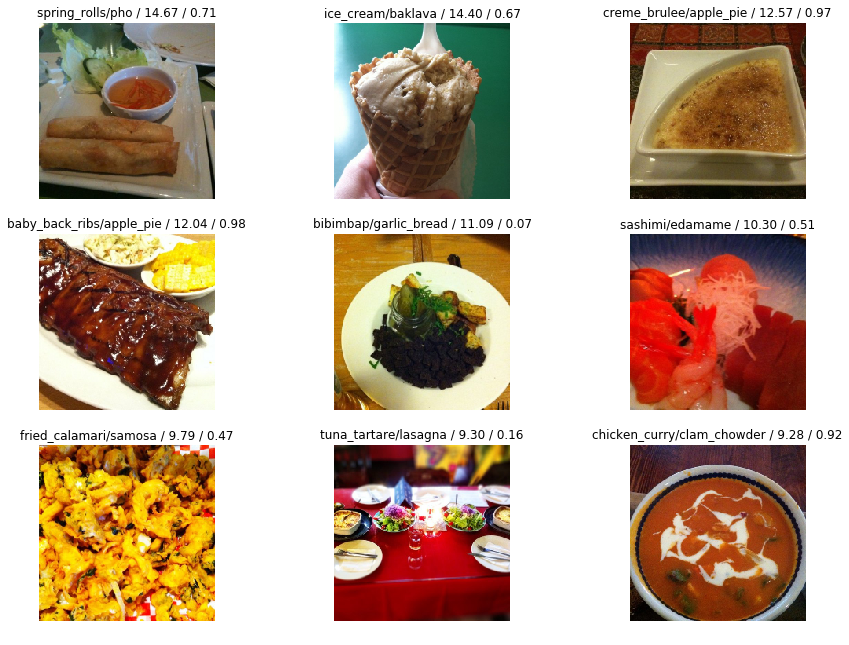

In [21]:
interp.plot_top_losses(9, figsize=(15, 11))

In [33]:
# Trying out progressive resizing

In [30]:
data2 = ImageDataBunch.from_csv(PATH, folder='images', fn_col=1, label_col=0, 
                                suffix='.jpg', size=256, ds_tfms=get_transforms(flip_vert=True), test='test')

In [31]:
learn.data = data2

In [37]:
learn.lr_find(start_lr=1e-9)

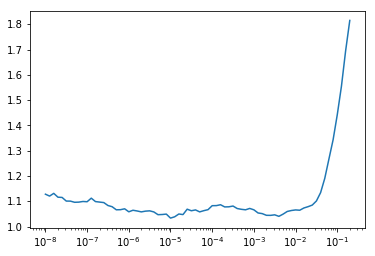

In [38]:
learn.recorder.plot()

In [40]:
learn.load('v1_test-food-101-stage-5')

In [41]:
learn.freeze()

In [42]:
learn.fit_one_cycle(1, max_lr=slice(1e-8, 1e-5))

ValueError: Expected more than 1 value per channel when training, got input size [1, 4096]

In [ ]:
%debug

> /home/ubuntu/src/anaconda3/envs/fastaiv1/lib/python3.6/site-packages/torch/nn/functional.py(1346)batch_norm()
   1344         size = list(input.size())
   1345         if reduce(mul, size[2:], size[0]) == 1:
-> 1346             raise ValueError('Expected more than 1 value per channel when training, got input size {}'.format(size))
   1347     return torch.batch_norm(
   1348         input, weight, bias, running_mean, running_var,

ipdb> input.size()
torch.Size([1, 4096])
ipdb> mulk
*** NameError: name 'mulk' is not defined
ipdb> up
> /home/ubuntu/src/anaconda3/envs/fastaiv1/lib/python3.6/site-packages/torch/nn/modules/batchnorm.py(67)forward()
     65             input, self.running_mean, self.running_var, self.weight, self.bias,
     66             self.training or not self.track_running_stats,
---> 67             exponential_average_factor, self.eps)
     68 
     69     def extra_repr(self):

ipdb> self.training
True
ipdb> up
> /home/ubuntu/src/anaconda3/envs/fastaiv1/lib/python3.

In [ ]:
confusion_before_unfreezing = [('chocolate_mousse', 'chocolate_cake', 19),
 ('steak', 'filet_mignon', 19),
 ('filet_mignon', 'steak', 18),
 ('beef_tartare', 'tuna_tartare', 17),
 ('ravioli', 'lasagna', 17),
 ('steak', 'prime_rib', 16),
 ('pork_chop', 'filet_mignon', 15),
 ('pulled_pork_sandwich', 'hamburger', 15),
 ('shrimp_and_grits', 'gnocchi', 14),
 ('tiramisu', 'chocolate_mousse', 14),
 ('club_sandwich', 'grilled_cheese_sandwich', 13),
 ('bread_pudding', 'apple_pie', 12),
 ('dumplings', 'gyoza', 11),
 ('filet_mignon', 'prime_rib', 11),
 ('pork_chop', 'grilled_salmon', 11),
 ('tuna_tartare', 'beef_tartare', 11),
 ('filet_mignon', 'crab_cakes', 10),
 ('gyoza', 'samosa', 10),
 ('sashimi', 'sushi', 10),
 ('apple_pie', 'baklava', 9),
 ('baby_back_ribs', 'steak', 9),
 ('cheesecake', 'strawberry_shortcake', 9),
 ('chocolate_cake', 'chocolate_mousse', 9),
 ('greek_salad', 'beet_salad', 9),
 ('lobster_bisque', 'clam_chowder', 9),
 ('onion_rings', 'fried_calamari', 9),
 ('red_velvet_cake', 'cup_cakes', 9),
 ('spaghetti_bolognese', 'spaghetti_carbonara', 9),
 ('sushi', 'sashimi', 9),
 ('clam_chowder', 'lobster_bisque', 8),
 ('foie_gras', 'scallops', 8),
 ('greek_salad', 'caprese_salad', 8),
 ('hamburger', 'pulled_pork_sandwich', 8),
 ('huevos_rancheros', 'tacos', 8),
 ('hummus', 'chicken_quesadilla', 8),
 ('ice_cream', 'chocolate_mousse', 8),
 ('ice_cream', 'frozen_yogurt', 8),
 ('paella', 'mussels', 8),
 ('pho', 'ramen', 8),
 ('pork_chop', 'steak', 8),
 ('prime_rib', 'steak', 8),
 ('steak', 'baby_back_ribs', 8),
 ('tuna_tartare', 'ceviche', 8),
 ('waffles', 'french_toast', 8),
 ('waffles', 'pancakes', 8),
 ('apple_pie', 'bread_pudding', 7),
 ('cheesecake', 'panna_cotta', 7),
 ('cheesecake', 'tiramisu', 7),
 ('chocolate_mousse', 'panna_cotta', 7),
 ('chocolate_mousse', 'tiramisu', 7),
 ('croque_madame', 'eggs_benedict', 7),
 ('cup_cakes', 'red_velvet_cake', 7),
 ('filet_mignon', 'pork_chop', 7),
 ('foie_gras', 'cheese_plate', 7),
 ('fried_rice', 'risotto', 7),
 ('garlic_bread', 'chicken_quesadilla', 7),
 ('gnocchi', 'ravioli', 7),
 ('grilled_salmon', 'crab_cakes', 7),
 ('guacamole', 'ceviche', 7),
 ('lasagna', 'french_onion_soup', 7),
 ('nachos', 'huevos_rancheros', 7),
 ('nachos', 'tacos', 7),
 ('omelette', 'huevos_rancheros', 7),
 ('pork_chop', 'scallops', 7),
 ('prime_rib', 'filet_mignon', 7),
 ('shrimp_and_grits', 'ravioli', 7),
 ('strawberry_shortcake', 'cheesecake', 7),
 ('baby_back_ribs', 'pork_chop', 6),
 ('beet_salad', 'beef_tartare', 6),
 ('bruschetta', 'caprese_salad', 6),
 ('carrot_cake', 'red_velvet_cake', 6),
 ('ceviche', 'greek_salad', 6),
 ('cheesecake', 'chocolate_cake', 6),
 ('chicken_quesadilla', 'breakfast_burrito', 6),
 ('chocolate_cake', 'tiramisu', 6),
 ('chocolate_mousse', 'ice_cream', 6),
 ('crab_cakes', 'scallops', 6),
 ('donuts', 'beignets', 6),
 ('falafel', 'breakfast_burrito', 6),
 ('french_onion_soup', 'hot_and_sour_soup', 6),
 ('garlic_bread', 'grilled_cheese_sandwich', 6),
 ('grilled_cheese_sandwich', 'club_sandwich', 6),
 ('grilled_cheese_sandwich', 'french_toast', 6),
 ('huevos_rancheros', 'nachos', 6),
 ('lobster_bisque', 'french_onion_soup', 6),
 ('omelette', 'pizza', 6),
 ('pancakes', 'french_toast', 6),
 ('panna_cotta', 'chocolate_mousse', 6),
 ('pork_chop', 'crab_cakes', 6),
 ('prime_rib', 'pork_chop', 6),
 ('ravioli', 'chicken_curry', 6),
 ('ravioli', 'gnocchi', 6),
 ('red_velvet_cake', 'carrot_cake', 6),
 ('samosa', 'spring_rolls', 6),
 ('scallops', 'crab_cakes', 6),
 ('scallops', 'gnocchi', 6),
 ('shrimp_and_grits', 'scallops', 6),
 ('steak', 'pork_chop', 6),
 ('baby_back_ribs', 'peking_duck', 5),
 ('baby_back_ribs', 'prime_rib', 5),
 ('baklava', 'apple_pie', 5),
 ('baklava', 'bread_pudding', 5),
 ('beef_carpaccio', 'beet_salad', 5),
 ('beet_salad', 'greek_salad', 5),
 ('beet_salad', 'tuna_tartare', 5),
 ('breakfast_burrito', 'huevos_rancheros', 5),
 ('ceviche', 'tuna_tartare', 5),
 ('cheesecake', 'cup_cakes', 5),
 ('cheese_plate', 'foie_gras', 5),
 ('chicken_curry', 'gnocchi', 5),
 ('chicken_quesadilla', 'tacos', 5),
 ('chicken_wings', 'fish_and_chips', 5),
 ('chocolate_cake', 'red_velvet_cake', 5),
 ('crab_cakes', 'falafel', 5),
 ('crab_cakes', 'fish_and_chips', 5),
 ('creme_brulee', 'panna_cotta', 5),
 ('donuts', 'takoyaki', 5),
 ('fish_and_chips', 'french_fries', 5),
 ('foie_gras', 'filet_mignon', 5),
 ('french_onion_soup', 'lasagna', 5),
 ('french_toast', 'bread_pudding', 5),
 ('french_toast', 'grilled_cheese_sandwich', 5),
 ('french_toast', 'waffles', 5),
 ('fried_rice', 'huevos_rancheros', 5),
 ('grilled_salmon', 'pork_chop', 5),
 ('gyoza', 'apple_pie', 5),
 ('hamburger', 'croque_madame', 5),
 ('huevos_rancheros', 'bruschetta', 5),
 ('huevos_rancheros', 'croque_madame', 5),
 ('huevos_rancheros', 'lasagna', 5),
 ('ice_cream', 'panna_cotta', 5),
 ('lasagna', 'bread_pudding', 5),
 ('nachos', 'guacamole', 5),
 ('paella', 'fried_rice', 5),
 ('pancakes', 'waffles', 5),
 ('panna_cotta', 'strawberry_shortcake', 5),
 ('ramen', 'miso_soup', 5),
 ('ramen', 'pho', 5),
 ('ravioli', 'ceviche', 5),
 ('ravioli', 'shrimp_and_grits', 5),
 ('red_velvet_cake', 'cheesecake', 5),
 ('shrimp_and_grits', 'chicken_curry', 5),
 ('spaghetti_bolognese', 'risotto', 5),
 ('spring_rolls', 'samosa', 5),
 ('tiramisu', 'chocolate_cake', 5),
 ('tuna_tartare', 'bruschetta', 5),
 ('waffles', 'bread_pudding', 5),
 ('apple_pie', 'beignets', 4),
 ('beet_salad', 'beef_carpaccio', 4),
 ('bibimbap', 'tacos', 4),
 ('breakfast_burrito', 'omelette', 4),
 ('breakfast_burrito', 'tacos', 4),
 ('bruschetta', 'pizza', 4),
 ('bruschetta', 'tacos', 4),
 ('caesar_salad', 'greek_salad', 4),
 ('cannoli', 'apple_pie', 4),
 ('cannoli', 'donuts', 4),
 ('caprese_salad', 'beef_carpaccio', 4),
 ('caprese_salad', 'beet_salad', 4),
 ('caprese_salad', 'bruschetta', 4),
 ('caprese_salad', 'greek_salad', 4),
 ('caprese_salad', 'scallops', 4),
 ('carrot_cake', 'cheesecake', 4),
 ('chicken_curry', 'hummus', 4),
 ('chicken_curry', 'omelette', 4),
 ('chocolate_cake', 'cheesecake', 4),
 ('chocolate_mousse', 'cheesecake', 4),
 ('clam_chowder', 'escargots', 4),
 ('club_sandwich', 'pulled_pork_sandwich', 4),
 ('cup_cakes', 'ice_cream', 4),
 ('escargots', 'ravioli', 4),
 ('fish_and_chips', 'fried_calamari', 4),
 ('fish_and_chips', 'grilled_cheese_sandwich', 4),
 ('foie_gras', 'beet_salad', 4),
 ('foie_gras', 'chocolate_mousse', 4),
 ('foie_gras', 'panna_cotta', 4),
 ('foie_gras', 'pork_chop', 4),
 ('french_fries', 'poutine', 4),
 ('fried_rice', 'bibimbap', 4),
 ('frozen_yogurt', 'ice_cream', 4),
 ('gnocchi', 'escargots', 4),
 ('gnocchi', 'scallops', 4),
 ('greek_salad', 'ceviche', 4),
 ('greek_salad', 'tacos', 4),
 ('grilled_salmon', 'filet_mignon', 4),
 ('hamburger', 'falafel', 4),
 ('hot_dog', 'tacos', 4),
 ('huevos_rancheros', 'breakfast_burrito', 4),
 ('huevos_rancheros', 'chicken_curry', 4),
 ('huevos_rancheros', 'chicken_quesadilla', 4),
 ('huevos_rancheros', 'eggs_benedict', 4),
 ('huevos_rancheros', 'shrimp_and_grits', 4),
 ('hummus', 'clam_chowder', 4),
 ('ice_cream', 'macarons', 4),
 ('lasagna', 'omelette', 4),
 ('lobster_bisque', 'panna_cotta', 4),
 ('lobster_roll_sandwich', 'ceviche', 4),
 ('nachos', 'waffles', 4),
 ('pad_thai', 'spaghetti_bolognese', 4),
 ('paella', 'bibimbap', 4),
 ('paella', 'pad_thai', 4),
 ('panna_cotta', 'foie_gras', 4),
 ('pizza', 'bruschetta', 4),
 ('pork_chop', 'prime_rib', 4),
 ('prime_rib', 'baby_back_ribs', 4),
 ('ramen', 'chicken_curry', 4),
 ('ramen', 'hot_and_sour_soup', 4),
 ('ravioli', 'risotto', 4),
 ('risotto', 'fried_rice', 4),
 ('risotto', 'grilled_salmon', 4),
 ('samosa', 'baklava', 4),
 ('scallops', 'deviled_eggs', 4),
 ('scallops', 'shrimp_and_grits', 4),
 ('seaweed_salad', 'bibimbap', 4),
 ('spaghetti_bolognese', 'lasagna', 4),
 ('spaghetti_carbonara', 'spaghetti_bolognese', 4),
 ('steak', 'foie_gras', 4),
 ('strawberry_shortcake', 'frozen_yogurt', 4),
 ('strawberry_shortcake', 'panna_cotta', 4),
 ('strawberry_shortcake', 'red_velvet_cake', 4),
 ('tacos', 'nachos', 4),
 ('takoyaki', 'donuts', 4),
 ('takoyaki', 'tacos', 4),
 ('tiramisu', 'cheesecake', 4),
 ('tuna_tartare', 'beet_salad', 4),
 ('waffles', 'apple_pie', 4),
 ('apple_pie', 'cheesecake', 3),
 ('apple_pie', 'grilled_cheese_sandwich', 3),
 ('baby_back_ribs', 'chicken_wings', 3),
 ('baklava', 'carrot_cake', 3),
 ('baklava', 'churros', 3),
 ('beef_carpaccio', 'bruschetta', 3),
 ('beef_tartare', 'bruschetta', 3),
 ('beef_tartare', 'steak', 3),
 ('beet_salad', 'ceviche', 3),
 ('beet_salad', 'scallops', 3),
 ('beignets', 'takoyaki', 3),
 ('bread_pudding', 'chocolate_cake', 3),
 ('bread_pudding', 'french_onion_soup', 3),
 ('bread_pudding', 'tiramisu', 3),
 ('breakfast_burrito', 'chicken_quesadilla', 3),
 ('breakfast_burrito', 'ice_cream', 3),
 ('breakfast_burrito', 'macaroni_and_cheese', 3),
 ('bruschetta', 'beet_salad', 3),
 ('bruschetta', 'cheese_plate', 3),
 ('bruschetta', 'lobster_roll_sandwich', 3),
 ('bruschetta', 'tuna_tartare', 3),
 ('caesar_salad', 'beet_salad', 3),
 ('cannoli', 'french_toast', 3),
 ('cannoli', 'ice_cream', 3),
 ('caprese_salad', 'panna_cotta', 3),
 ('caprese_salad', 'sashimi', 3),
 ('caprese_salad', 'sushi', 3),
 ('carrot_cake', 'bread_pudding', 3),
 ('carrot_cake', 'french_toast', 3),
 ('carrot_cake', 'tiramisu', 3),
 ('ceviche', 'beet_salad', 3),
 ('ceviche', 'ravioli', 3),
 ('ceviche', 'risotto', 3),
 ('ceviche', 'scallops', 3),
 ('cheese_plate', 'hummus', 3),
 ('chicken_curry', 'lobster_bisque', 3),
 ('chicken_curry', 'prime_rib', 3),
 ('chicken_curry', 'risotto', 3),
 ('chicken_curry', 'tacos', 3),
 ('chicken_quesadilla', 'ceviche', 3),
 ('chicken_quesadilla', 'club_sandwich', 3),
 ('chicken_quesadilla', 'falafel', 3),
 ('chicken_quesadilla', 'garlic_bread', 3),
 ('chicken_quesadilla', 'grilled_cheese_sandwich', 3),
 ('chicken_quesadilla', 'hummus', 3),
 ('chicken_quesadilla', 'nachos', 3),
 ('chicken_quesadilla', 'omelette', 3),
 ('chicken_wings', 'french_toast', 3),
 ('chicken_wings', 'onion_rings', 3),
 ('chicken_wings', 'peking_duck', 3),
 ('chocolate_cake', 'cup_cakes', 3),
 ('chocolate_mousse', 'creme_brulee', 3),
 ('churros', 'waffles', 3),
 ('clam_chowder', 'french_onion_soup', 3),
 ('club_sandwich', 'french_fries', 3),
 ('crab_cakes', 'beef_carpaccio', 3),
 ('crab_cakes', 'eggs_benedict', 3),
 ('crab_cakes', 'grilled_salmon', 3),
 ('crab_cakes', 'risotto', 3),
 ('crab_cakes', 'tuna_tartare', 3),
 ('creme_brulee', 'lobster_bisque', 3),
 ('croque_madame', 'lasagna', 3),
 ('cup_cakes', 'chocolate_mousse', 3),
 ('deviled_eggs', 'scallops', 3),
 ('donuts', 'falafel', 3),
 ('donuts', 'garlic_bread', 3),
 ('donuts', 'macarons', 3),
 ('escargots', 'french_onion_soup', 3),
 ('escargots', 'miso_soup', 3),
 ('falafel', 'crab_cakes', 3),
 ('filet_mignon', 'spaghetti_bolognese', 3),
 ('fish_and_chips', 'chicken_wings', 3),
 ('fish_and_chips', 'lobster_roll_sandwich', 3),
 ('foie_gras', 'peking_duck', 3),
 ('french_onion_soup', 'escargots', 3),
 ('french_toast', 'apple_pie', 3),
 ('fried_calamari', 'onion_rings', 3),
 ('fried_rice', 'lasagna', 3),
 ('fried_rice', 'paella', 3),
 ('garlic_bread', 'bruschetta', 3),
 ('garlic_bread', 'takoyaki', 3),
 ('greek_salad', 'caesar_salad', 3),
 ('greek_salad', 'gnocchi', 3),
 ('greek_salad', 'grilled_salmon', 3),
 ('grilled_cheese_sandwich', 'garlic_bread', 3),
 ('grilled_salmon', 'chicken_wings', 3),
 ('grilled_salmon', 'foie_gras', 3),
 ('grilled_salmon', 'grilled_cheese_sandwich', 3),
 ('grilled_salmon', 'omelette', 3),
 ('gyoza', 'dumplings', 3),
 ('hamburger', 'crab_cakes', 3),
 ('hamburger', 'hot_dog', 3),
 ('hot_and_sour_soup', 'pho', 3),
 ('hot_dog', 'hamburger', 3),
 ('huevos_rancheros', 'french_toast', 3),
 ('huevos_rancheros', 'omelette', 3),
 ('huevos_rancheros', 'ravioli', 3),
 ('hummus', 'ceviche', 3),
 ('hummus', 'creme_brulee', 3),
 ('hummus', 'falafel', 3),
 ('hummus', 'guacamole', 3),
 ('hummus', 'ice_cream', 3),
 ('ice_cream', 'donuts', 3),
 ('ice_cream', 'waffles', 3),
 ('lasagna', 'breakfast_burrito', 3),
 ('lasagna', 'chicken_curry', 3),
 ('lasagna', 'huevos_rancheros', 3),
 ('lasagna', 'pizza', 3),
 ('lasagna', 'ravioli', 3),
 ('lobster_bisque', 'creme_brulee', 3),
 ('macaroni_and_cheese', 'creme_brulee', 3),
 ('macaroni_and_cheese', 'gnocchi', 3),
 ('macaroni_and_cheese', 'lasagna', 3),
 ('macaroni_and_cheese', 'ravioli', 3),
 ('macaroni_and_cheese', 'risotto', 3),
 ('macarons', 'cup_cakes', 3),
 ('miso_soup', 'hot_and_sour_soup', 3),
 ('miso_soup', 'pho', 3),
 ('mussels', 'escargots', 3),
 ('nachos', 'breakfast_burrito', 3),
 ('nachos', 'ceviche', 3),
 ('nachos', 'eggs_benedict', 3),
 ('nachos', 'lasagna', 3),
 ('nachos', 'pizza', 3),
 ('omelette', 'breakfast_burrito', 3),
 ('omelette', 'chicken_quesadilla', 3),
 ('omelette', 'grilled_cheese_sandwich', 3),
 ('omelette', 'lasagna', 3),
 ('oysters', 'escargots', 3),
 ('pad_thai', 'spaghetti_carbonara', 3),
 ('paella', 'chicken_curry', 3),
 ('pancakes', 'apple_pie', 3),
 ('pancakes', 'cheesecake', 3),
 ('pancakes', 'macarons', 3),
 ('pancakes', 'strawberry_shortcake', 3),
 ('panna_cotta', 'cheesecake', 3),
 ('panna_cotta', 'lobster_bisque', 3),
 ('peking_duck', 'baby_back_ribs', 3),
 ('peking_duck', 'foie_gras', 3),
 ('pho', 'hot_and_sour_soup', 3),
 ('pizza', 'french_toast', 3),
 ('pizza', 'omelette', 3),
 ('pork_chop', 'baby_back_ribs', 3),
 ('pork_chop', 'chicken_wings', 3),
 ('poutine', 'french_fries', 3),
 ('poutine', 'gnocchi', 3),
 ('pulled_pork_sandwich', 'lobster_roll_sandwich', 3),
 ('pulled_pork_sandwich', 'prime_rib', 3),
 ('red_velvet_cake', 'panna_cotta', 3),
 ('risotto', 'guacamole', 3),
 ('risotto', 'paella', 3),
 ('risotto', 'shrimp_and_grits', 3),
 ('samosa', 'omelette', 3),
 ('sashimi', 'beet_salad', 3),
 ('scallops', 'foie_gras', 3),
 ('scallops', 'sashimi', 3),
 ('shrimp_and_grits', 'risotto', 3),
 ('steak', 'french_toast', 3),
 ('strawberry_shortcake', 'cup_cakes', 3),
 ('strawberry_shortcake', 'waffles', 3),
 ('tacos', 'breakfast_burrito', 3),
 ('tacos', 'club_sandwich', 3),
 ('tiramisu', 'red_velvet_cake', 3),
 ('tuna_tartare', 'crab_cakes', 3),
 ('tuna_tartare', 'foie_gras', 3),
 ('waffles', 'bruschetta', 3),
 ('waffles', 'cannoli', 3),
 ('waffles', 'strawberry_shortcake', 3)]

In [ ]:
confusion_after_unfreezing = [('filet_mignon', 'steak', 19),
 ('prime_rib', 'steak', 17),
 ('steak', 'filet_mignon', 17),
 ('steak', 'prime_rib', 13),
 ('beef_tartare', 'tuna_tartare', 11),
 ('chocolate_mousse', 'chocolate_cake', 11),
 ('donuts', 'beignets', 11),
 ('pork_chop', 'steak', 10),
 ('tiramisu', 'chocolate_mousse', 10),
 ('shrimp_and_grits', 'gnocchi', 9),
 ('apple_pie', 'bread_pudding', 8),
 ('chocolate_cake', 'chocolate_mousse', 8),
 ('dumplings', 'gyoza', 8),
 ('pork_chop', 'baby_back_ribs', 8),
 ('tuna_tartare', 'ceviche', 8),
 ('bread_pudding', 'apple_pie', 7),
 ('cheesecake', 'strawberry_shortcake', 7),
 ('chocolate_mousse', 'panna_cotta', 7),
 ('filet_mignon', 'pork_chop', 7),
 ('gnocchi', 'ravioli', 7),
 ('grilled_salmon', 'pork_chop', 7),
 ('ice_cream', 'frozen_yogurt', 7),
 ('ravioli', 'gnocchi', 7),
 ('ravioli', 'lasagna', 7),
 ('steak', 'pork_chop', 7),
 ('sushi', 'sashimi', 7),
 ('cheesecake', 'panna_cotta', 6),
 ('chocolate_cake', 'tiramisu', 6),
 ('french_toast', 'bread_pudding', 6),
 ('omelette', 'huevos_rancheros', 6),
 ('pork_chop', 'grilled_salmon', 6),
 ('red_velvet_cake', 'cup_cakes', 6),
 ('sashimi', 'sushi', 6),
 ('tuna_tartare', 'beef_tartare', 6),
 ('caprese_salad', 'greek_salad', 5),
 ('ceviche', 'tuna_tartare', 5),
 ('falafel', 'breakfast_burrito', 5),
 ('foie_gras', 'scallops', 5),
 ('fried_calamari', 'onion_rings', 5),
 ('frozen_yogurt', 'ice_cream', 5),
 ('garlic_bread', 'pizza', 5),
 ('huevos_rancheros', 'nachos', 5),
 ('lobster_bisque', 'clam_chowder', 5),
 ('pork_chop', 'foie_gras', 5),
 ('pulled_pork_sandwich', 'hamburger', 5),
 ('red_velvet_cake', 'chocolate_cake', 5),
 ('shrimp_and_grits', 'ravioli', 5),
 ('steak', 'baby_back_ribs', 5),
 ('strawberry_shortcake', 'cheesecake', 5),
 ('strawberry_shortcake', 'panna_cotta', 5),
 ('apple_pie', 'waffles', 4),
 ('beef_tartare', 'foie_gras', 4),
 ('beet_salad', 'greek_salad', 4),
 ('breakfast_burrito', 'huevos_rancheros', 4),
 ('breakfast_burrito', 'tacos', 4),
 ('chicken_curry', 'lasagna', 4),
 ('chocolate_cake', 'red_velvet_cake', 4),
 ('clam_chowder', 'lobster_bisque', 4),
 ('filet_mignon', 'prime_rib', 4),
 ('foie_gras', 'beet_salad', 4),
 ('french_fries', 'poutine', 4),
 ('french_toast', 'garlic_bread', 4),
 ('greek_salad', 'caesar_salad', 4),
 ('grilled_cheese_sandwich', 'club_sandwich', 4),
 ('grilled_cheese_sandwich', 'garlic_bread', 4),
 ('gyoza', 'dumplings', 4),
 ('hamburger', 'pulled_pork_sandwich', 4),
 ('huevos_rancheros', 'croque_madame', 4),
 ('ice_cream', 'chocolate_mousse', 4),
 ('lasagna', 'pizza', 4),
 ('nachos', 'tacos', 4),
 ('panna_cotta', 'chocolate_mousse', 4),
 ('panna_cotta', 'tiramisu', 4),
 ('pho', 'hot_and_sour_soup', 4),
 ('pork_chop', 'scallops', 4),
 ('risotto', 'paella', 4),
 ('risotto', 'shrimp_and_grits', 4),
 ('samosa', 'spring_rolls', 4),
 ('scallops', 'foie_gras', 4),
 ('tuna_tartare', 'beet_salad', 4),
 ('baby_back_ribs', 'peking_duck', 3),
 ('baby_back_ribs', 'pork_chop', 3),
 ('baby_back_ribs', 'steak', 3),
 ('beef_carpaccio', 'tuna_tartare', 3),
 ('beet_salad', 'beef_carpaccio', 3),
 ('beet_salad', 'foie_gras', 3),
 ('bruschetta', 'caprese_salad', 3),
 ('caprese_salad', 'beef_carpaccio', 3),
 ('caprese_salad', 'beet_salad', 3),
 ('carrot_cake', 'bread_pudding', 3),
 ('carrot_cake', 'cup_cakes', 3),
 ('cheesecake', 'bread_pudding', 3),
 ('cheesecake', 'chocolate_mousse', 3),
 ('chicken_curry', 'chicken_wings', 3),
 ('chicken_curry', 'lobster_bisque', 3),
 ('chicken_curry', 'paella', 3),
 ('chicken_quesadilla', 'garlic_bread', 3),
 ('chicken_quesadilla', 'tacos', 3),
 ('chocolate_mousse', 'tiramisu', 3),
 ('churros', 'waffles', 3),
 ('club_sandwich', 'grilled_cheese_sandwich', 3),
 ('club_sandwich', 'hamburger', 3),
 ('crab_cakes', 'tuna_tartare', 3),
 ('croque_madame', 'eggs_benedict', 3),
 ('escargots', 'french_onion_soup', 3),
 ('falafel', 'crab_cakes', 3),
 ('falafel', 'hummus', 3),
 ('fish_and_chips', 'chicken_wings', 3),
 ('foie_gras', 'beignets', 3),
 ('foie_gras', 'bread_pudding', 3),
 ('foie_gras', 'ice_cream', 3),
 ('foie_gras', 'ramen', 3),
 ('french_onion_soup', 'lobster_bisque', 3),
 ('french_toast', 'pancakes', 3),
 ('fried_rice', 'risotto', 3),
 ('garlic_bread', 'french_toast', 3),
 ('gnocchi', 'shrimp_and_grits', 3),
 ('grilled_cheese_sandwich', 'french_toast', 3),
 ('guacamole', 'nachos', 3),
 ('ice_cream', 'chocolate_cake', 3),
 ('lasagna', 'french_onion_soup', 3),
 ('lasagna', 'macaroni_and_cheese', 3),
 ('lasagna', 'ravioli', 3),
 ('mussels', 'paella', 3),
 ('pad_thai', 'spaghetti_bolognese', 3),
 ('pork_chop', 'filet_mignon', 3),
 ('poutine', 'french_fries', 3),
 ('prime_rib', 'baby_back_ribs', 3),
 ('pulled_pork_sandwich', 'grilled_cheese_sandwich', 3),
 ('pulled_pork_sandwich', 'hot_dog', 3),
 ('ramen', 'hot_and_sour_soup', 3),
 ('ramen', 'pho', 3),
 ('ravioli', 'scallops', 3),
 ('risotto', 'gnocchi', 3),
 ('samosa', 'dumplings', 3),
 ('scallops', 'deviled_eggs', 3),
 ('scallops', 'gnocchi', 3),
 ('shrimp_and_grits', 'scallops', 3),
 ('tacos', 'club_sandwich', 3),
 ('tacos', 'guacamole', 3),
 ('tiramisu', 'bread_pudding', 3),
 ('tiramisu', 'panna_cotta', 3),
 ('tiramisu', 'red_velvet_cake', 3),
 ('waffles', 'pancakes', 3)]